# CS4320 - Introduction to Machine Learning 

## Homework 3: Preprocessing 

**Please type your name and A number here:**

In [58]:
Name = "Carter Watson"
assert Name != "", 'Please enter your name in the above quotation marks, thanks!'

A_number = "A02312565"
assert A_number != "", 'Please enter your A-number in the above quotation marks, thanks!'

credit = "https://chat.openai.com/share/b7324c74-9ad7-4e91-863d-fd7435e0e972"
assert credit != "", 'Please enter your link to chatgpt conversation in the above quotation marks, thanks!'

## Imports 

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

## Exercise 1: Introducing the dataset <a name="1"></a>
<hr>

In this lab, you will be working on [the adult census dataset](https://www.kaggle.com/uciml/adult-census-income#). Download the CSV and save it as `adult.csv` locally in this homework folder. 

This is a classification dataset and the classification task is to predict whether income exceeds 50K per year or not based on the census data. You can find more information on the dataset and features [here](http://archive.ics.uci.edu/ml/datasets/Adult).

The starter code below loads the data CSV (assuming that it is saved as `adult.csv` in this folder). 

_Note that many popular datasets have sex as a feature where the possible values are male and female. This representation reflects how the data were collected and is not meant to imply that, for example, gender is binary._

In [60]:
census_df = pd.read_csv("adult.csv")
census_df.shape

(32561, 15)

### 1. Data splitting
rubric={points:4}

In order to avoid violation of the golden rule, the first step before we do anything is splitting the data. 

**Your tasks:**

  Split the data into `train_df` (50%) and `test_df` (50%) with `random_state = 10`. Keep the target column (`income`) in the splits so that we can use it in the exploratory data analysis.

(_Usually having more data for training is a good idea. But here I'm using 50%/50% split because this is kind of a big dataset for a modest laptop. A smaller training data means it won't take too long to train the model on your laptop. A side advantage of this would be that with a bigger test split, we'll have a more reliable estimate of the deployment performance!_)

In [61]:
# Splitting the data
train_df, test_df = train_test_split(census_df, test_size=0.5, random_state=10)

# Display the shapes of the training and testing datasets
train_df.shape, test_df.shape

((16280, 15), (16281, 15))

## Exercise 2: Exploratory data analysis (EDA) <a name="2"></a> 
<hr>

Let's examine our `train_df`. 

In [62]:
train_df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
32545,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32547,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


We see some missing values represented with a "?". Probably these were the questions not answered by some people during the census.  Usually `.describe()` or `.info()` methods would give you information on missing values. But here, they won't pick "?" as missing values as they are encoded as strings instead of an actual NaN in Python. So let's replace them with `np.nan` before we carry out EDA. If you do not do it, you'll encounter an error later on when you try to pass this data to a classifier. 

In [63]:
train_df_nan = train_df.replace("?", np.nan)
test_df_nan = test_df.replace("?", np.nan)
train_df_nan.shape

(16280, 15)

In [64]:
train_df_nan.sort_index() # The "?" symbols are now replaced with NaN values. 

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,72,NaN,129912,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,United-States,<=50K
32545,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32547,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


### 2.1 Visualizing features
rubric={points:10}

**Your tasks:**

1. Examine the information given by `train_df_nan.info()` and `train_df_nan.describe()` methods. In case of `.describe()`, you can optimally use the `include="all"` argument to show summary statistics of all  features. {points:2}
2. Visualize the histograms of numeric features (Hint: use "df.hist" to show the distribution of numeric features). {points:4} 
3. From the visualizations, which features seem relevant for the given prediction task?(You can pick multi-features). {points:4}

> Note: (Optional) If you're feeling excited about this you are welcome to use [`pandas_profiling`](https://github.com/pandas-profiling/pandas-profiling) for more elaborate visualization and EDA. 

In [65]:
# Task 1: (Hint: just print the train_df_nan.info and train_df_nan.describe)
print(train_df_nan.info())
print(train_df_nan.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16280 entries, 27978 to 17673
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16280 non-null  int64 
 1   workclass       15403 non-null  object
 2   fnlwgt          16280 non-null  int64 
 3   education       16280 non-null  object
 4   education.num   16280 non-null  int64 
 5   marital.status  16280 non-null  object
 6   occupation      15398 non-null  object
 7   relationship    16280 non-null  object
 8   race            16280 non-null  object
 9   sex             16280 non-null  object
 10  capital.gain    16280 non-null  int64 
 11  capital.loss    16280 non-null  int64 
 12  hours.per.week  16280 non-null  int64 
 13  native.country  15998 non-null  object
 14  income          16280 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.0+ MB
None
               age        fnlwgt  education.num  capital.gain  capital.loss  \
count

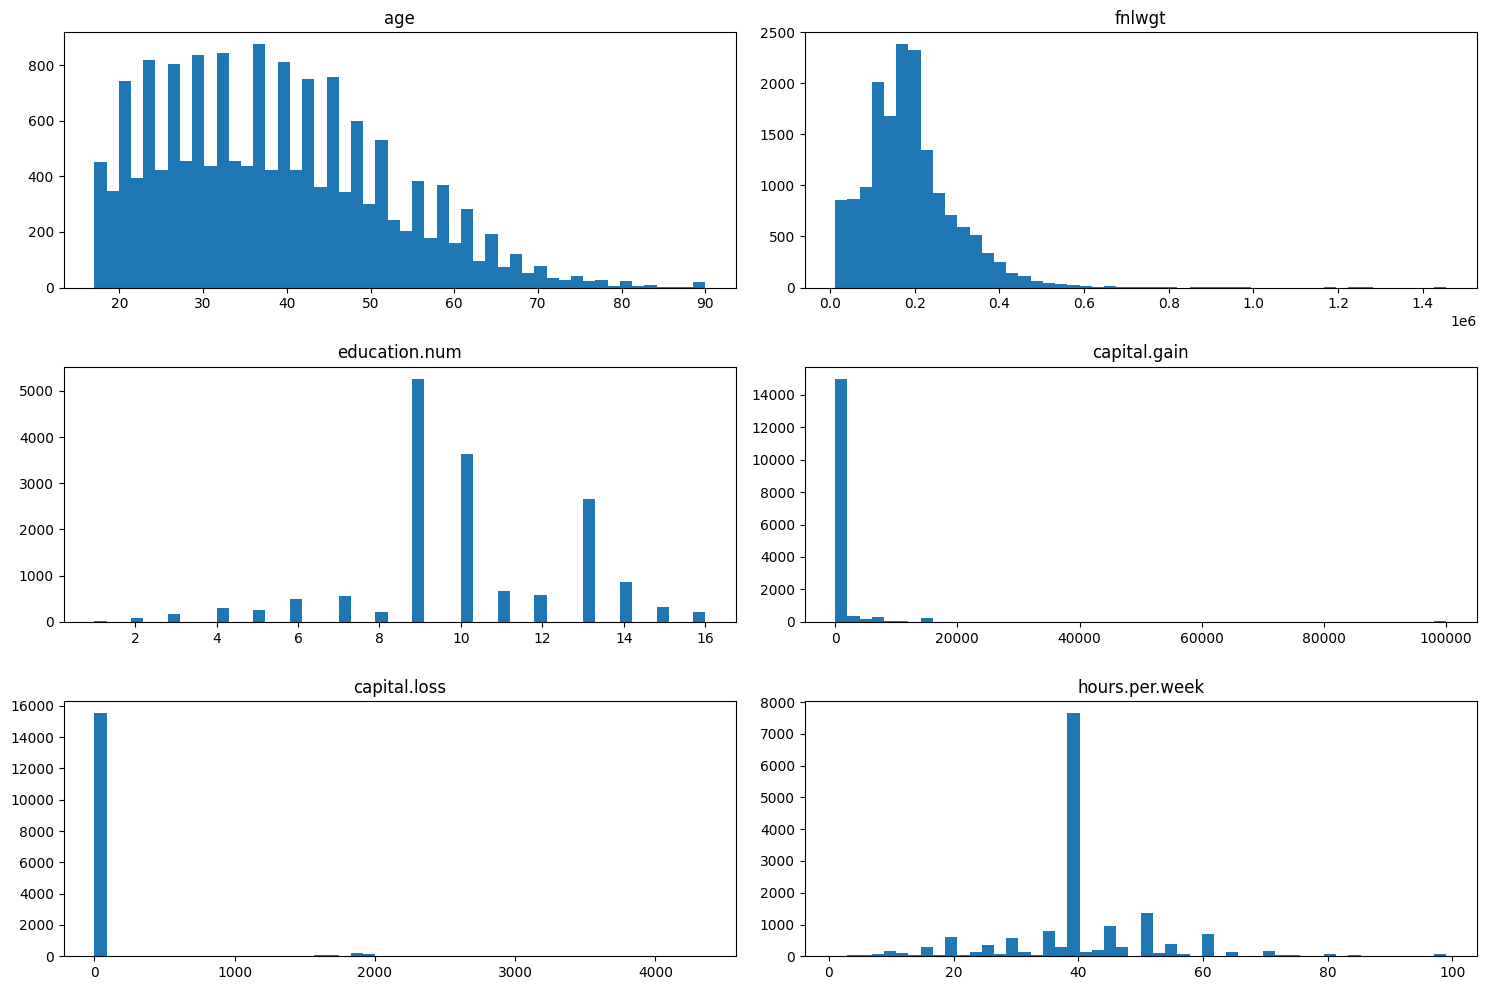

In [66]:
# Plotting histograms for numeric features
train_df.hist(figsize=(15, 10), bins=50, grid=False)
plt.tight_layout()
plt.show()

In [67]:
# Task 3: Pick the features

# Answer:
# Given the goal of predicting income, the following features seem particularly relevant:
# Age: Earning potential often changes with age.
# Capital Gain & Capital Loss: Directly related to an individual's financial situation.
# Education Number: Higher educational attainment can correlate with higher incomes.
# Hours per Week: Part-time vs. full-time work can influence income.

### 2.2 Identify transformations to apply
rubric={points:20}

**Your tasks:**
1. Identify what kind of feature transformations you would apply on each column in the dataset and fill in the table below accordingly. You may decide to apply any transformations on a certain column or entirely drop a column from your model. That's totally fine. We use imputation and One-Hot encoding for feature occupation here. {points: 13} 
2. Identify different feature types for applying different transformations. In particular, fill in the lists below. {points: 5} 
3. Is including the `race` feature for predicting income ethically a good idea? Briefly discuss. {points: 2}

> Note: This question is a bit open-ended and there is no single correct solution.

Task 1:
Fill in the table with feature transformation techniques. You can drop this column by filling in "drop".{points:13}

| Feature          | Transformation                                  | Type         |
|------------------|-------------------------------------------------|--------------|
| occupation       | imputation, One-Hot Encoding                    | Categorical  |
| age              | Possibly binned                                 | Numerical    |
| workclass        | One-Hot Encoding (with imputation for `?`)      | Categorical  |
| fnlwgt           | Possible drop or normalization                  | Numerical    |
| education        | One-Hot Encoding or Ordinal Encoding            | Ordinal      |
| education.num    | drop                                            | Numerical    |
| marital.status   | One-Hot Encoding                                | Categorical  |
| relationship     | One-Hot Encoding                                | Categorical  |
| race             | drop                                            | Categorical  |
| sex              | drop                                            | Binary       |
| capital.gain     | Keep as-is or create net capital change         | Numerical    |
| capital.loss     | Keep as-is or create net capital change         | Numerical    |
| hours.per.week   | Keep as-is or possibly binned                   | Numerical    |
| native.country   | One-Hot Encoding or group by region             | Categorical  |


In [68]:
# Task 2: fill in the lists with feature name.
# Example: numeric_features = ["age"] 
# It's OK to keep some of the lists empty or add new lists.{points:5}
# Features lists
numeric_features = ["age", "fnlwgt",] 
categorical_features = ["occupation", "workclass", "marital.status", "relationship", "native.country"] 
ordinal_features = ["education"] 
binary_features = [] 
drop_features = ["sex", "race", "education.num"]  # do not include these features in modeling
passthrough_features = ["capital.gain", "capital.loss", "hours.per.week"] # do not apply any transformation

target = "income"

In [69]:
# Task 3: Is including the `race` feature for predicting income ethically a good idea? Briefly discuss.{points:2}
# No, including race as a feature for predicting income is ethically not a good idea.
# Including race would only be a vector through which to introduce bias into the model.
# Race may be useful in data analysis in order to find solutions to racial income inequality but it is not a good idea for a model that creates predictions.

### 2.3 Separating feature vectors and targets  
rubric={points:6}

**Your tasks:**

1. Create `X_train`, `y_train`, `X_test`, `y_test` from `train_df_nan` and `test_df_nan`. {points: 4}
2. At this point, if you train [`sklearn`'s `SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model on `X_train` and `y_train` would it work? Why or why not? {points: 2}

In [70]:
# Task 1 (Split the dataset):
# Splitting the data into features and target
X_train = train_df.drop(columns='income')
y_train = train_df['income']

X_test = test_df.drop(columns='income')
y_test = test_df['income']

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((16280, 14), (16280,), (16281, 14), (16281,))

In [71]:
# Task 2: 
# Answer:
# No it would not work because
# - the features have not been encoded yet
# - there are missing values
# - features should be standardized
# - there may be too much training to do depending on the hardware

## Exercise 3: Preprocessing <a name="3"></a>
<hr>

### 3.1 Preprocessing using `sklearn`'s `ColumnTransformer` and `Pipeline`
rubric={points:18}

Let's carry out preprocessing using `sklearn`'s `ColumnTransformer` and `Pipeline`. Note that you can define pipelines in two ways: 
- by using [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and explicitly providing named steps
- by using [`make_pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline), which automatically names the steps in the pipeline with their class names. 

Similarly you can create a column transformer in two ways:
- by using [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- by using [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) 

You may use the method of your choice but `make_pipeline` and `make_column_transformer` are highly recommended.  

**Your tasks:**

1. Create a column transformer `preprocessor` based on transformations you want to apply on the data from 2.2. {points: 10}
2. Transform the data by calling `fit_transform` on the training set. What's the shape of the transformed data? {points: 4} 
3. Why do we need to use a column transformer in this case? Briefly explain. {points: 4} 

In [72]:
# Task 1:
# Define columns for different transformations
impute_cols = ['workclass', 'occupation']
onehot_cols = ['workclass', 'occupation', 'education', 'marital.status', 'relationship', 'native.country']
scale_cols = ['age', 'capital.gain', 'capital.loss', 'hours.per.week']

# Create the preprocessor using make_column_transformer
preprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore')), impute_cols),
    (OneHotEncoder(handle_unknown='ignore'), onehot_cols),
    (StandardScaler(), scale_cols),
)

# Display the preprocessor
preprocessor


ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['workclass', 'occupation']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['workclass', 'occupation', 'education',
                                  'marital.status', 'relationship',
                                  'native.country']),
                                ('standardscaler', StandardScaler(),
                                 ['age', 'capital.gain', 'capital.loss',
                                  'hours.per.week'])])

In [73]:
# Task 2:
# Dropping the columns from X_train
X_train_dropped = X_train.drop(columns=['race', 'sex', 'education.num'])

# Update the lists of columns for transformations
onehot_cols = [col for col in onehot_cols if col not in ['race', 'education']]
scale_cols = [col for col in scale_cols if col != 'education.num']

# Update the preprocessor to handle the dropped columns
preprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore')), impute_cols),
    (OneHotEncoder(handle_unknown='ignore'), onehot_cols),
    (StandardScaler(), scale_cols)
)

# Transforming the updated training data
X_train_transformed_dropped = preprocessor.fit_transform(X_train_dropped)

# Getting the shape of the transformed data
X_train_transformed_dropped.shape


(16280, 106)

In [74]:
# Task 3:
# Answer:
# Using a column transformer is essential for datasets with mixed feature types.
# It ensures consistent preprocessing across different data subsets, streamlines integration into larger pipelines, and helps avoid potential data leakage.
# In essence, it's a vital tool for reliable and efficient data preprocessing.

## Exercise 4: Building models <a name="4"></a>
<hr>

Now that we have preprocessed features, we are ready to build models. Below, I'm providing the function we used in class which returns mean cross-validation score along with standard deviation for a given model. Feel free to use it to keep track of your results if you like. 

In [75]:
results_dict = {}  # dictionary to store all the results

In [76]:
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

### 4.1 Baseline model 
rubric={points:6}

**Your tasks:**
1. Define a pipeline with two steps: `preprocessor` from 3.1 and `scikit-learn`'s `DummyClassifier` with `strategy="prior"` as your classifier. {points:3} 
2. Carry out 5-fold cross-validation with the pipeline. Store the results in `results_dict` above. Display the results as a pandas DataFrame.  {points:3} 

> You may use the function `mean_std_cross_val_scores` above to carry out cross-validation and storing results. Refer to the class notes if you are unsure about how to use it. 

In [77]:
# Task 1:
# Define the pipeline
pipeline = make_pipeline(preprocessor, DummyClassifier(strategy="prior"))

# Display the pipeline
pipeline


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'occupation']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'occupation',
                                                   'marital.status',
                                                   'relationship',
                                                   'native.country']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week'])])),
                ('dummyclassifier', DummyClassifier())])

In [78]:
# Task 2:
# 5-fold cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Storing the results in a dictionary
results_dict = {"DummyClassifier": cv_scores}

# Displaying the results as a pandas DataFrame
results_df = pd.DataFrame(results_dict)
results_df

,DummyClassifier
0,0.758907
1,0.758907
2,0.758907
3,0.758907
4,0.758907


### 4.2 Trying different classifiers
rubric={points:12}

**Your tasks:**

1. For each of the models in the starter code below: {points: 5}
    - Define a pipeline with two steps: `preprocessor` from 3.1 and the model as your classifier. 
    - Carry out 5-fold cross-validation with the pipeline.  
    - Store the results in `results_dict`. 
2. Display all the results so far as a pandas dataframe. {points: 2}
3. Compare the train and validation accuracies and `fit` and `score` times in each case. How do the the validation accuracies compare to the baseline model from 4.1? Which model has the best validation accuracy? Which model is the fastest one(Pick one from: Dummy classifier, decision tree, KNN, SVM)? {points: 5} 

> Note that this might take a while to run.

> You may use the function above `mean_std_cross_val_scores` to carry out cross-validation and storing results. Refer to the class notes if you are unsure about how to use it. 

In [79]:
models = {
    "decision tree": DecisionTreeClassifier(),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(),
}

In [80]:
# For each model, define a pipeline and carry out 5-fold cross-validation
for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    results_dict[name] = cv_scores


In [81]:
# Task 2:
results_df = pd.DataFrame(results_dict)
print(results_df)

   DummyClassifier  decision tree       kNN   RBF SVM
0         0.758907       0.823096  0.834767  0.856880
1         0.758907       0.806818  0.829853  0.850123
2         0.758907       0.815725  0.819103  0.842752
3         0.758907       0.808661  0.821867  0.844287
4         0.758907       0.824631  0.823710  0.855344


In [82]:
# Task 3:
# Calculate the mean validation accuracy for each model
mean_accuracies = results_df.mean()

# Compare the validation accuracies to the baseline model
baseline_accuracy = mean_accuracies["DummyClassifier"]
print("Validation Accuracies Compared to Baseline (DummyClassifier):")
for model, accuracy in mean_accuracies.items():
    difference = accuracy - baseline_accuracy
    print(f"\t{model}: {accuracy:.4f} (Difference from baseline: {difference:.4f})")

# Identify the model with the best validation accuracy
best_model = mean_accuracies.idxmax()
print(f"\nThe model with the best validation accuracy is: {best_model} with accuracy of {mean_accuracies[best_model]:.4f}")

# Answer: DummyClassifier

Validation Accuracies Compared to Baseline (DummyClassifier):
	DummyClassifier: 0.7589 (Difference from baseline: 0.0000)
	decision tree: 0.8158 (Difference from baseline: 0.0569)
	kNN: 0.8259 (Difference from baseline: 0.0670)
	RBF SVM: 0.8499 (Difference from baseline: 0.0910)

The model with the best validation accuracy is: RBF SVM with accuracy of 0.8499


### 4.3 Exploring importance of scaling
rubric={points:10}

In this exercise you'll examine whether scaling helps in case of KNNs and SVM RBFs. 

**Your tasks:**

1. Create a column transformer without the `StandardScaler` step for `numeric_features`. {points:4} 
2. Repeat the steps in 4.2 with this new column transformer. Save all results in "results_dic_compare" {points: 4}
3. Compare the results of scaled numeric features with unscaled numeric features. Is scaling necessary for decision trees? Why or why not? {points:2}

In [83]:
results_dict_compare = {}  # dictionary to store all the results

In [84]:
# Task 1:
# Update the preprocessor to exclude StandardScaler for numeric features
preprocessor_no_scaling = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore')), impute_cols),
    (OneHotEncoder(handle_unknown='ignore'), onehot_cols),
    ('passthrough', scale_cols)  # Instead of scaling, we'll simply pass through the numeric features
)

preprocessor_no_scaling

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['workclass', 'occupation']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['workclass', 'occupation', 'marital.status',
                                  'relationship', 'native.country']),
                                ('passthrough', 'passthrough',
                                 ['age', 'capital.gain', 'capital.loss',
                                  'hours.per.week'])])

In [85]:
# Task 2: 
# For each model, define a pipeline with the new preprocessor and carry out 5-fold cross-validation
for name, model in models.items():
    pipeline = make_pipeline(preprocessor_no_scaling, model)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    results_dict_compare[name] = cv_scores

results_df_compare = pd.DataFrame(results_dict_compare)
results_df_compare


,decision tree,kNN,RBF SVM
0,0.817875,0.842752,0.801597
1,0.809275,0.823096,0.800061
2,0.813882,0.823710,0.801597
3,0.805590,0.825553,0.808661
4,0.824017,0.826781,0.801597


In [86]:
# Task 3:
# Calculate mean accuracies for both results
mean_accuracies_scaled = results_df.mean()
mean_accuracies_unscaled = results_df_compare.mean()

comparison_df = pd.DataFrame({
    "Scaled Features": mean_accuracies_scaled,
    "Unscaled Features": mean_accuracies_unscaled,
    "Difference": mean_accuracies_unscaled - mean_accuracies_scaled
})

comparison_df

# Answer: 
# Scaling is not necessary for decision trees because they make splits based on feature values, irrespective of their scale.
# Unlike algorithms like KNN, where feature scale impacts distances between data points, decision trees are unaffected by feature scaling.
# Hence, for decision trees, the performance remains consistent whether features are scaled or not.

,Scaled Features,Unscaled Features,Difference
DummyClassifier,0.758907,NaN,NaN
RBF SVM,0.849877,0.802703,-0.047174
decision tree,0.815786,0.814128,-0.001658
kNN,0.825860,0.828378,0.002518


### 4.4 Hyperparameter optimization
rubric={points:8}

In this exercise, you'll carry out hyperparameter optimization for the hyperparameter `C` of SVC RBF classifier. In practice you'll carry out hyperparameter optimization for all different hyperparameters for the most promising classifiers. For the purpose of this assignment, we'll only do it for the `SVC` classifier with one hyperparameter: `C`. 

**Your tasks:**

1. For each `C` value in the `param_grid` in the starter code below: 
    - Create a pipeline object with two steps: preprocessor from 3.1 and `SVC` classifier with the value of `C`.
    - Carry out 5-fold cross validation with the pipeline.  
    - Store the results in `results_dict` and display results as a pandas DataFrame. {points:4} 
2. The hyperparameter `C = 1.0` is the default value in `scikit-learn`. Does this default value (`C = 1.0`) seem reasonable, meaning it is performing the best or comparable to the best `C` values? {points:4}

> Note: Running this might take a while.(Waite patiently: about 9 min on colab) 

In [87]:
param_grid = {"C": np.logspace(-2, 2, 5)}
param_grid

{'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])}

In [88]:
# Task 1:
# Iterating over the C values, creating a pipeline, and performing 5-fold cross-validation
for c_value in param_grid['C']:
    pipeline_svc = make_pipeline(preprocessor, SVC(C=c_value))
    cv_scores = cross_val_score(pipeline_svc, X_train, y_train, cv=5)
    results_dict[f"SVC_C_{c_value}"] = cv_scores

# Displaying the updated results as a pandas DataFrame
results_df_updated = pd.DataFrame(results_dict)
results_df_updated

,DummyClassifier,decision tree,kNN,RBF SVM,SVC_C_0.01,SVC_C_0.1,SVC_C_1.0,SVC_C_10.0,SVC_C_100.0
0,0.758907,0.823096,0.834767,0.856880,0.771499,0.851966,0.856880,0.854730,0.845823
1,0.758907,0.806818,0.829853,0.850123,0.770270,0.840909,0.850123,0.850737,0.840602
2,0.758907,0.815725,0.819103,0.842752,0.771499,0.838759,0.842752,0.840909,0.833538
3,0.758907,0.808661,0.821867,0.844287,0.769042,0.839373,0.844287,0.842445,0.830467
4,0.758907,0.824631,0.823710,0.855344,0.769656,0.851966,0.855344,0.854423,0.847973


In [89]:
# Task 2:
# Extract the mean accuracy for each C value
mean_accuracies = results_df_updated.mean()

# Check if the default value C=1.0 is reasonable
best_C = mean_accuracies.idxmax()
best_accuracy = mean_accuracies.max()
default_accuracy = mean_accuracies['SVC_C_1.0']

print(f"The best C value is: {best_C.split('_')[-1]} with an accuracy of {best_accuracy:.4f}")
print(f"The accuracy with default C=1.0 is: {default_accuracy:.4f}")

if best_C == 'SVC_C_1.0':
    print("The default value C=1.0 is the best choice.")
else:
    print("The default value C=1.0 is not the best choice.")

The best C value is: RBF SVM with an accuracy of 0.8499
The accuracy with default C=1.0 is: 0.8499
The default value C=1.0 is not the best choice.


## Exercise 5: Evaluating on the test set <a name="5"></a>
<hr>

Now that we have a best performing model, it's time to assess our model on the set aside test set. In this exercise you'll examine whether the results you obtained using cross-validation on the train set are consistent with the results on the test set. 

### 5.1 Scoring on the unseen test set 
rubric={points:6}

**Your tasks:**

1. Train the best performing model on the entire training set. {points:2} 
2. Report the results of this model on `X_test`. Hint: Categorical features may be different in training set and test set. So, when you make your preprocessor, you need to make argment "handle_unknown='ignore'" {points: 2}
3. Are the cross-validation results and test results consistent? {points:2} 

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
# Task 1:
# Defining the best model
best_model = SVC(C=1.0)

# Creating a pipeline for the best model
best_pipeline = make_pipeline(preprocessor, best_model)

# Training the model on the entire training set
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'occupation']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['workclass', 'occupation',
                                                   'marital.status',
                                                   'relationship',
                                                   'native.country']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week'])])),
                ('svc', SVC())])

In [92]:
# Task 2:
# Preparing X_test and y_test
X_test = test_df.drop(columns=['income', 'race', 'sex', 'education.num'])
y_test = test_df['income']

# Predicting and scoring on the test set
test_score = best_pipeline.score(X_test, y_test)
print(f"Test accuracy with the best model: {test_score:.4f}")

Test accuracy with the best model: 0.8488


In [93]:
# Task 3:
# Extracting mean cross-validation accuracy for the best model
cv_accuracy = mean_accuracies['SVC_C_1.0']

print(f"Mean cross-validation accuracy with the best model: {cv_accuracy:.4f}")

# Comparing CV results with test results
difference = test_score - cv_accuracy
if abs(difference) < 0.02:  # Assuming a threshold of 2% for consistency
    print("The cross-validation results and test results are consistent.")
else:
    print("The cross-validation results and test results are not consistent.")

# Answer:

Mean cross-validation accuracy with the best model: 0.8499
The cross-validation results and test results are consistent.


## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
2. Notebooks with cell execution numbers out of order will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Please keep your notebook clean and delete any throwaway code.